In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<Axes: >

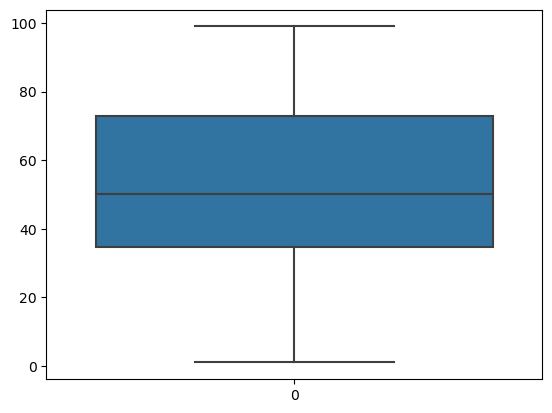

In [7]:
sns.boxplot(df["Spending Score (1-100)"])

<Axes: >

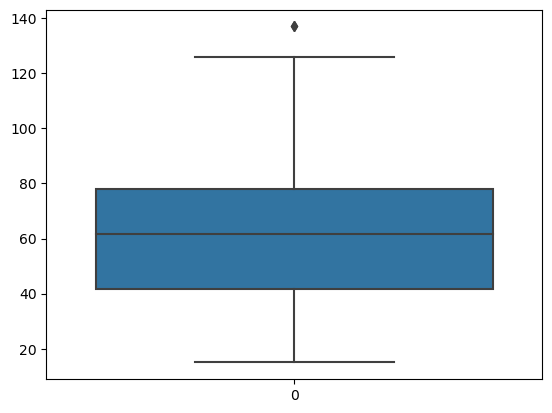

In [8]:
sns.boxplot(df["Annual Income (k$)"])

<Axes: >

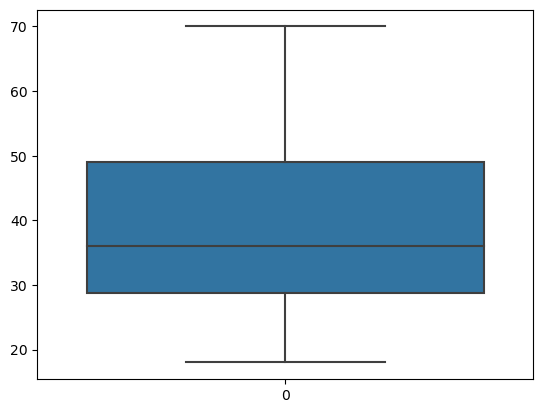

In [9]:
sns.boxplot(df["Age"])

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

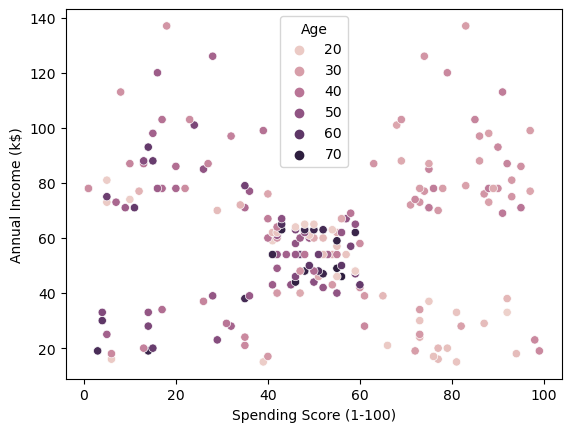

In [10]:
sns.scatterplot(data=df,hue="Age",y="Annual Income (k$)",x="Spending Score (1-100)")

In [11]:
df["Gender"]=pd.get_dummies(df["Gender"],prefix="Gender",drop_first=True)


In [12]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [13]:
X=df.iloc[:,2:5].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

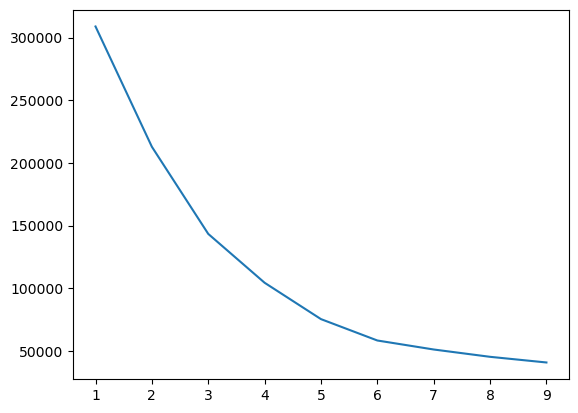

In [14]:
WCSS=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,10),WCSS)

In [17]:
!pip install kneed
from kneed import KneeLocator
knee1=KneeLocator(range(1,10),WCSS,curve="convex",direction="decreasing")
knee1.elbow

4

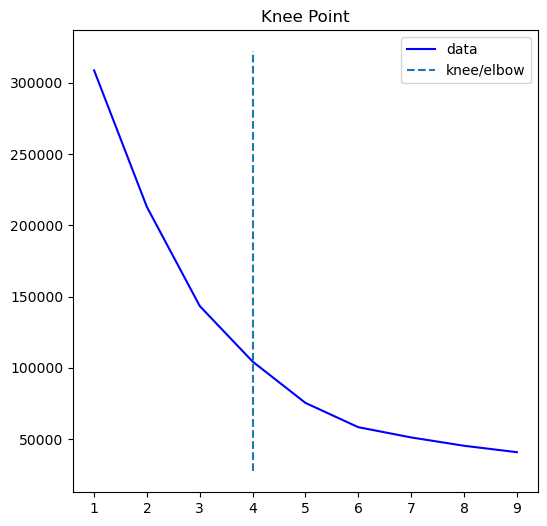

In [18]:
knee1.plot_knee()

In [19]:
model=KMeans(n_clusters=5)
new_cluster=model.fit(X)

In [20]:
df["cluster"]=new_cluster.labels_

In [21]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,1
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,4
197,198,1,32,126,74,2
198,199,1,32,137,18,4


In [22]:
centroids=new_cluster.cluster_centers_
centroids

array([[45.2173913 , 26.30434783, 20.91304348],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333]])

In [23]:
from sklearn.metrics import silhouette_score


In [24]:
silhouette=[]
n_cluster=[2,3,4,5,6,7,8,9,10]

for i in n_cluster:
    kmeans=KMeans(n_clusters=i,random_state=10)
    predict=kmeans.fit_predict(X)
    score=silhouette_score(X,predict,random_state=10)
    silhouette.append(score)
    print("silhouette_score for {} is {}".format(i,score))
   

silhouette_score for 2 is 0.293166070535953
silhouette_score for 3 is 0.3839349967742105
silhouette_score for 4 is 0.40546302077733304
silhouette_score for 5 is 0.44428597560893024
silhouette_score for 6 is 0.4523443947724053
silhouette_score for 7 is 0.4398198217929885
silhouette_score for 8 is 0.4352315435135759
silhouette_score for 9 is 0.4083885402537527
silhouette_score for 10 is 0.38328343620113586


<BarContainer object of 9 artists>

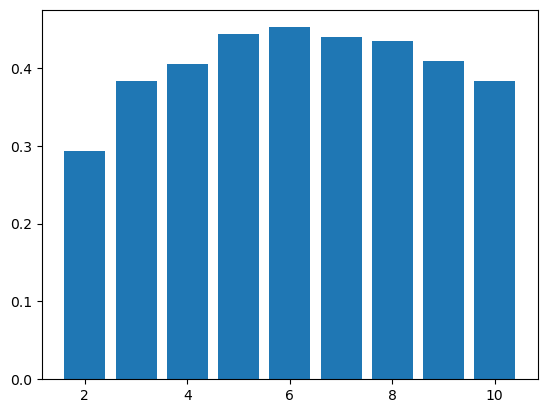

In [25]:
plt.bar(range(2,11),silhouette)

In [26]:
from yellowbrick.cluster import silhouette_visualizer

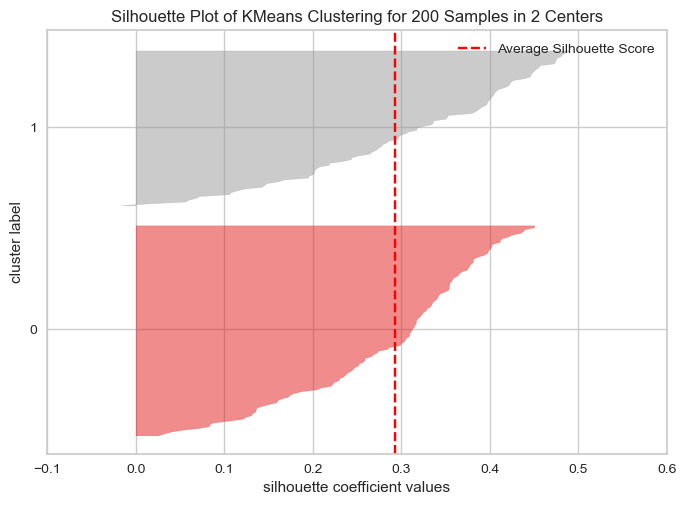

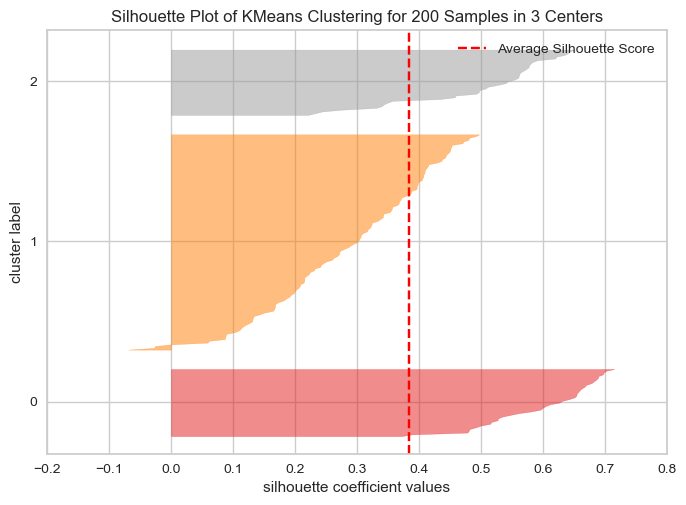

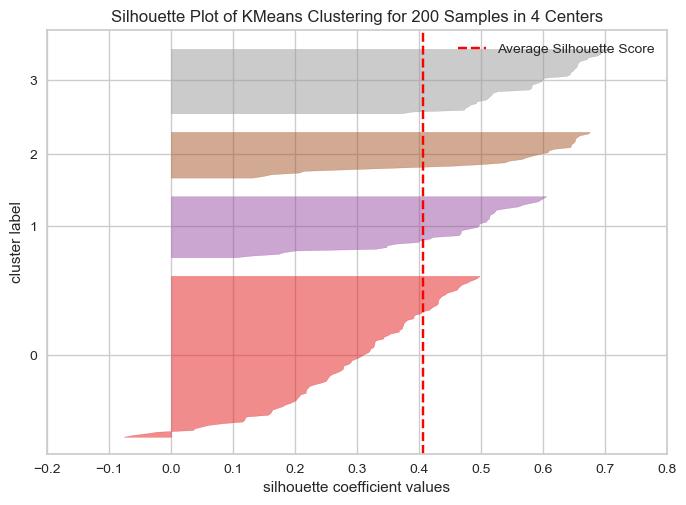

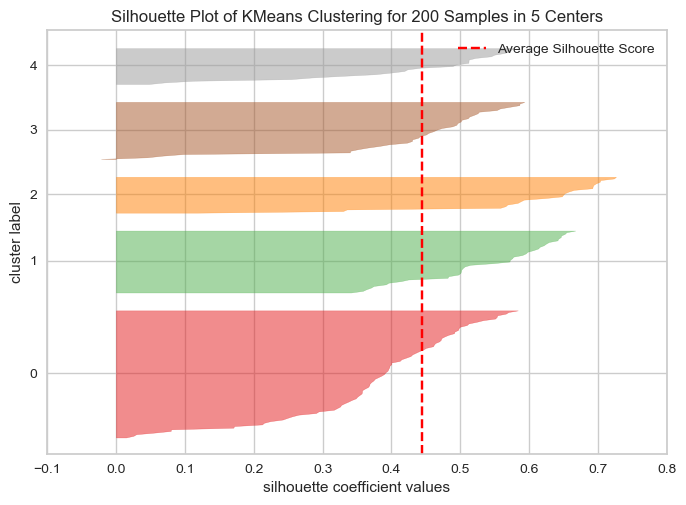

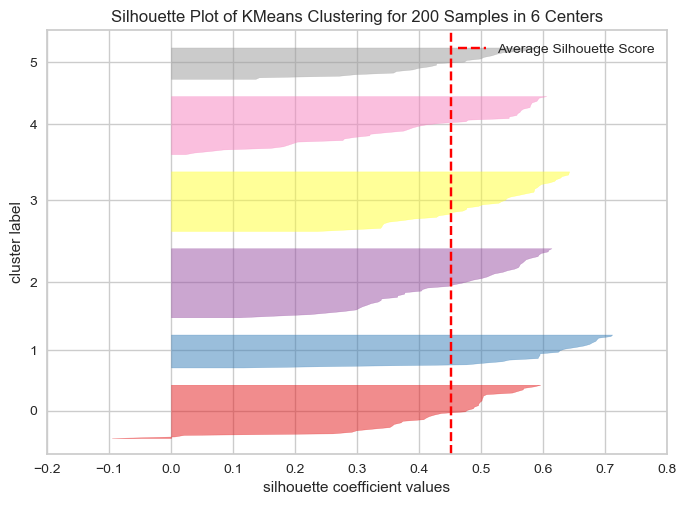

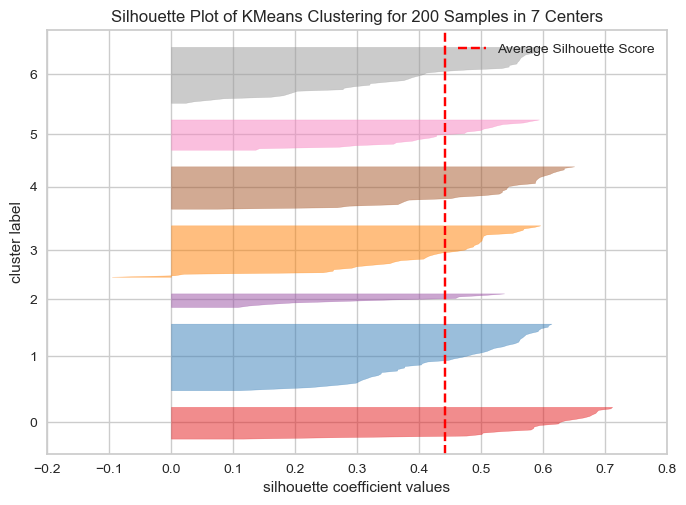

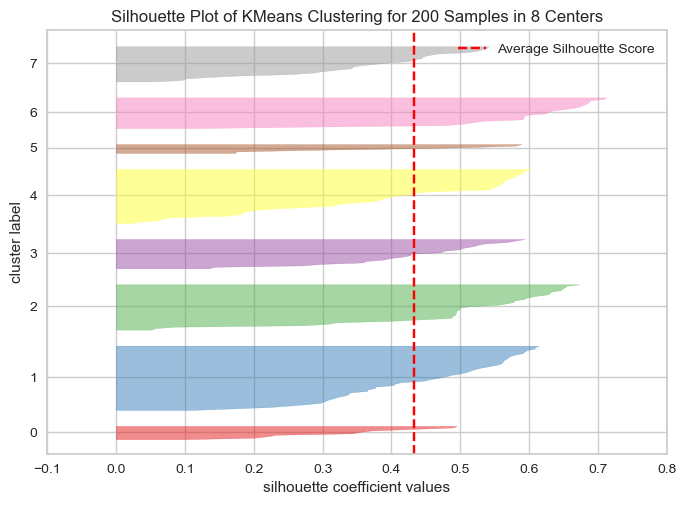

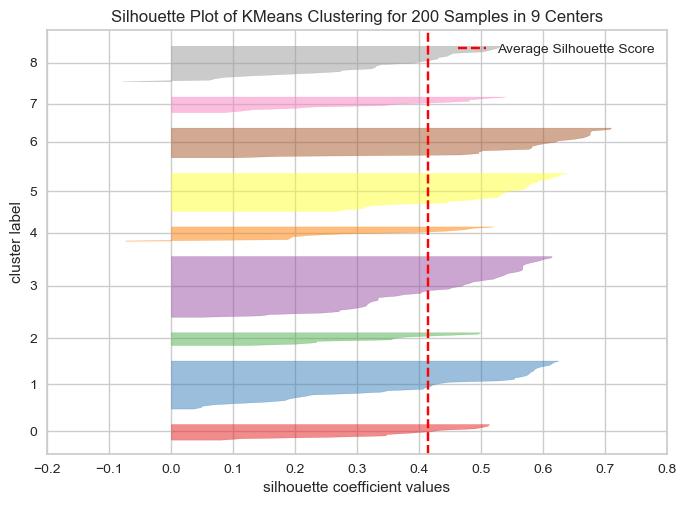

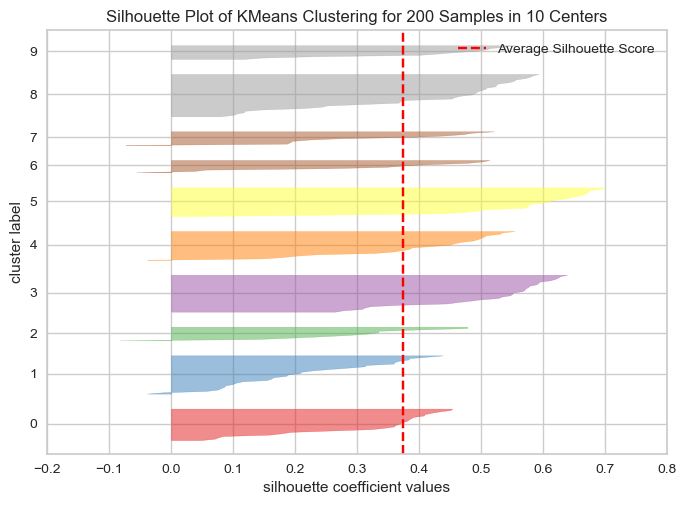

In [27]:
n_clusters=[2,3,4,5,6,7,8,9,10]
X=np.array(X)
for i in n_clusters:
    silhouette_visualizer(KMeans(i),X)

In [28]:
model=KMeans(n_clusters=5)
new_cluster=model.fit(X)

In [29]:
df["cluster"]=new_cluster.labels_

In [30]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,2
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,4
196,197,0,45,126,28,3
197,198,1,32,126,74,4
198,199,1,32,137,18,3


In [31]:
Y = kmeans.fit_predict(X)

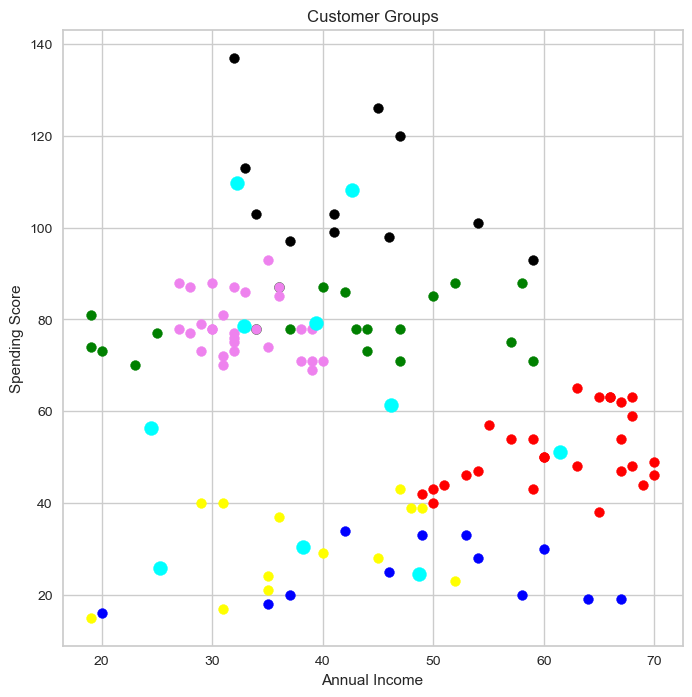

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='black', label='Cluster 6')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()